In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
import sys
import matplotlib
from matplotlib.ticker import MaxNLocator
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from numpy.random import randn, shuffle
from scipy import linspace, meshgrid, arange, empty, concatenate, newaxis, shape


In [2]:
k0 = 2*np.pi/1.5 
a,b,n1,n2 = [1,1,1.5,1.49]
x = np.linspace(-10,10,101)
y = np.linspace(-10,10,101)

<h1> STEP_1

In [3]:
# Defining n^2(x,y) # Modify this later

def n_sq(x,y):
    n_x = np.zeros(len(x))
    n_y = np.zeros(len(y))
    n_t=[]
    for i in range(len(x)):
        for j in range (len(y)):
            
            if np.abs(x[i]) < a and np.abs(y[j]) < b :
                n_t = n_t+[n1**2]
                
            else:
                n_t=n_t+[n2**2]
#     for j in range(len(y)):
#             if np.abs(y[j]) < b:
#                 n_y[j] = n1
#                 elif y[j] > b:
#                     n_y[j] = n2}
        
    return (n_t)

# Defining n(y) # Initial guess , if this didn't work, chose a different value

In [4]:
# Defining n^2(x,y) # Modify this later

def n_p_x(x,n1,n2,a):
    n = []
    for i in x:
        if abs(i) < a:
            n= n+ [n1]
        else:
            n= n+ [n2]
    return np.asarray(n)

def nsq_x(x):
    n = []
    for i in x:
        if abs(i) < a:
            n= n+ [n1**2]
        else:
            n= n+ [n2**2]
    return np.asarray(n)

def n_p_y(y):
    n = []
    for i in y:
        if abs(i) < b:
            n= n+ [n1**2]
        else:
            n= n+ [n2**2]
    return np.asarray(n)

len(n_sq(x,y))

10201

In [5]:
len(n_p_y(y))

101

In [6]:
# # # n_sq_values = n_sq(x,y)
# # nsq_y(y)  = n_p_y(y,n1,n2,b)**2
# nsq_y(y) 

<h1> STEP_2

In [7]:
# Finding β^2_y
β2_y = 6.251442319733478

In [8]:
κ = (k0**2*n1**2 -β2_y**2) **0.5
γ = (-k0**2*n2**2 +β2_y**2) **0.5

def Y(y):
    Y=[]
    for i in y:
        if np.abs(i) < b:
            ans = np.cos(κ*i)
        else:
            ans = np.exp(-γ*np.abs(i))*np.cos(κ*b) / (np.exp(-γ*b))
        Y=Y+[ans]
    return np.asarray(Y)


In [9]:
# Plotting Y(y)
plt.plot(y,Y(y))
plt.grid()

In [10]:
# Normalize Y(y)

# Integrating Using Simpson Method
h = y[1]-y[0]
def Simpson(func,h):
    N = len(func)
    sum = ( func[0]+ func[-1] ) 
    h = y[1]-y[0]
    for i in range(1,N-1,2):
        sum = sum+ 4*func[i]
    
    for i in range(2,N-2,2):
        sum =sum+ 2*func[i]
    return h*sum/3

In [11]:
# Return an array
def Normalize(f,h):
    Norm = Simpson(f**2,h)
    return f / (Norm)**0.5

In [12]:
Norm = Simpson(Y(y)**2,h)
# Return a function
def Normalize_fun(y):
    Y=[]
    for i in y:
        if np.abs(i) < b:
            ans = np.cos(κ*i)
        else:
            ans = np.exp(-γ*np.abs(i))*np.cos(κ) / (np.exp(-γ))
        Y=Y+[ans]
    return np.asarray(Y)/(Norm)**0.5

In [13]:
h=y[1]-y[0]
Y_y = Normalize(Y(y),h)

In [14]:
# Plotting Normalized Y(y)
plt.plot(y,Normalize_fun(y))
plt.grid()

<h1> STEP_3

In [15]:
# Finding n_x

# h=y[1] - y[0]
# def n2_x(x,y):
#     N=[]
#     for i in x:
#         n = []
#         k = range(len(x))
#         for j in y:

#             n = n + [(n_sq([i],[j]) - n_p_y([j])) * (Normalize_fun([j]))**2]
#         #N=N+[(h*((n[0]+n[-1])+(2*sum(n[1:-1])))/2)+(k0*n1)**2]  
#         N=N+[ Simpson(n,h)  +(k0*n1)**2]
#     return np.asarray(N)
# print(n2_x(x,y))

In [16]:
# w=[]
# for i in range (len(y)-1):
#     if N[i]-N[i+1]!=0:
#         Nx=[N[i],N[i+1]]
#         w= w+[y[i]]
        
# print(Nx)

In [17]:
39.4784176**0.5

6.2831853068328325

In [18]:
 39.46489016**0.5

6.282108735130267

In [19]:
 N=[]
for i in x:
    n=[]
    for j in y:
        
        n = n + [(n_sq([i],[j]) - n_p_y([j])) * (Normalize_fun([j]))**2]
    N= N+[(h*((n[0]+n[-1])+(2*sum(n[1:-1])))/2)+(k0*n1)**2]    
print(np.asarray(N))
n2_x=N

[[39.46489016]
 [39.46489016]
 [39.46489016]
 [39.46489016]
 [39.46489016]
 [39.46489016]
 [39.46489016]
 [39.46489016]
 [39.46489016]
 [39.46489016]
 [39.46489016]
 [39.46489016]
 [39.46489016]
 [39.46489016]
 [39.46489016]
 [39.46489016]
 [39.46489016]
 [39.46489016]
 [39.46489016]
 [39.46489016]
 [39.46489016]
 [39.46489016]
 [39.46489016]
 [39.46489016]
 [39.46489016]
 [39.46489016]
 [39.46489016]
 [39.46489016]
 [39.46489016]
 [39.46489016]
 [39.46489016]
 [39.46489016]
 [39.46489016]
 [39.46489016]
 [39.46489016]
 [39.46489016]
 [39.46489016]
 [39.46489016]
 [39.46489016]
 [39.46489016]
 [39.46489016]
 [39.46489016]
 [39.46489016]
 [39.46489016]
 [39.46489016]
 [39.46489016]
 [39.4784176 ]
 [39.4784176 ]
 [39.4784176 ]
 [39.4784176 ]
 [39.4784176 ]
 [39.4784176 ]
 [39.4784176 ]
 [39.4784176 ]
 [39.4784176 ]
 [39.46489016]
 [39.46489016]
 [39.46489016]
 [39.46489016]
 [39.46489016]
 [39.46489016]
 [39.46489016]
 [39.46489016]
 [39.46489016]
 [39.46489016]
 [39.46489016]
 [39.46489

<h1> STEP_4

In [20]:
w=[]
for i in range (len(y)-1):
    if N[i]-N[i+1]!=0:
        Nx=[N[i],N[i+1]]
        w= w+[y[i]]
        
print(w[-1]-w[0])

1.8000000000000007


In [21]:
# Defining X(x)

β2_x = 26.301788914338406
n11=6.2831853068328325
n22=6.282108735130267
b1=1.8000000000000007/2

κ1= (k0**2*n11**2 - β2_x**2) **0.5
γ1 = (k0**2*n22**2 -β2_x**2) **0.5

def X(x):
    X=[]
    for i in x:
        if np.abs(i) < b1:
            ans = np.cos(κ1*i)
        else:
            ans = np.exp(-γ1*np.abs(i))*np.cos(κ1*b1) / (np.exp(-γ1*b1))
        X=X+[ans]
    return np.asarray(X)
plt.grid()
plt.plot(x,X(x))

In [22]:
# # Normalize X(x)

# # Integrating Using Simpson Method
# h1 = x[1]-x[0]
# def Simpson(func,h1):
#     N3 = len(func)
#     sum = ( func[0]+ func[-1] ) 
#      h1 = y[1]-y[0]
#     for i in range(1,N3-1,2):
#         sum = sum+ 4*func[i]
    
#     for i in range(2,N3-2,2):
#         sum =sum+ 2*func[i]
#     return h1*sum/3

In [23]:
# # Return an array
# def Normalize(f1,h1):
#     Norma = Simpson(f1**2,h1)
#     return f1 / (Norma)**0.5

In [24]:
# # Plotting Normalized Y(y)
# plt.plot(x,Normalize_fun(x))
# plt.grid()

<h1> STEP_5

In [25]:
N1=[]
for i in y:
    n=[]
    for j in range(len(x)):
        
        n = n + [(n_sq([i],[j]) - n2_x[j]) * (X([j]))**2]
    N1= N1+[(h*((n[0]+n[-1])+(2*sum(n[1:-1])))/2)+(k0*n1)**2]    
print(np.asarray(N1))
n2_y = np.asarray(N1)

[[32.36734728]
 [32.36734728]
 [32.36734728]
 [32.36734728]
 [32.36734728]
 [32.36734728]
 [32.36734728]
 [32.36734728]
 [32.36734728]
 [32.36734728]
 [32.36734728]
 [32.36734728]
 [32.36734728]
 [32.36734728]
 [32.36734728]
 [32.36734728]
 [32.36734728]
 [32.36734728]
 [32.36734728]
 [32.36734728]
 [32.36734728]
 [32.36734728]
 [32.36734728]
 [32.36734728]
 [32.36734728]
 [32.36734728]
 [32.36734728]
 [32.36734728]
 [32.36734728]
 [32.36734728]
 [32.36734728]
 [32.36734728]
 [32.36734728]
 [32.36734728]
 [32.36734728]
 [32.36734728]
 [32.36734728]
 [32.36734728]
 [32.36734728]
 [32.36734728]
 [32.36734728]
 [32.36734728]
 [32.36734728]
 [32.36734728]
 [32.36734728]
 [32.36734728]
 [32.37033728]
 [32.37033728]
 [32.37033728]
 [32.37033728]
 [32.37033728]
 [32.37033728]
 [32.37033728]
 [32.37033728]
 [32.37033728]
 [32.36734728]
 [32.36734728]
 [32.36734728]
 [32.36734728]
 [32.36734728]
 [32.36734728]
 [32.36734728]
 [32.36734728]
 [32.36734728]
 [32.36734728]
 [32.36734728]
 [32.36734

<h1> STEP_6

In [26]:
w1=[]
for i in range (len(y)-1):
    if N1[i]-N1[i+1]!=0:
        Nx1 = [N1[i],N1[i+1]]
        w1 = w1+[y[i]]
        
print(Nx1)

[array([32.37033728]), array([32.36734728])]


In [27]:
32.37033728**0.5

5.689493587306343

In [28]:
32.36734728**0.5

5.689230816200024

In [29]:
# Defining Y(y)

β2_y = 23.818957255615096
n111=5.689493587306343
n222=5.689230816200024

a1=1.8000000000000007/2

κ11= (k0**2*n111**2 - β2_y**2) **0.5
γ11 = (k0**2*n222**2 -β2_y**2) **0.5

def Y(y):
    Y=[]
    for i in y:
        if np.abs(i) < a1:
            ans = np.cos(κ11*i)
        else:
            ans = np.exp(-γ11*np.abs(i))*np.cos(κ11*a1) / (np.exp(-γ11*a1))
        Y=Y+[ans]
    return np.asarray(Y)
plt.grid()
plt.plot(y,Y(y))

<h1> STEP_7

In [30]:
βt_sq = β2_x**2 + β2_y**2-(k0*n1)**2
βt_sq

1219.6484072348762

In [31]:
k0

4.1887902047863905

In [32]:
n1

1.5

<h1>STEP_3a

In [33]:
 N3=[]
for i in x:
    n=[]
    for j in range (len(y)):
        
        n = n + [(n_sq([i],[j]) - n2_y[j]) * Y([j])**2]
    N3= N3+[(h*((n[0]+n[-1])+(2*sum(n[1:-1])))/2)+(k0*n1)**2]    
print(np.asarray(N3))
n2a_x=N3

[[32.65726767]
 [32.65726767]
 [32.65726767]
 [32.65726767]
 [32.65726767]
 [32.65726767]
 [32.65726767]
 [32.65726767]
 [32.65726767]
 [32.65726767]
 [32.65726767]
 [32.65726767]
 [32.65726767]
 [32.65726767]
 [32.65726767]
 [32.65726767]
 [32.65726767]
 [32.65726767]
 [32.65726767]
 [32.65726767]
 [32.65726767]
 [32.65726767]
 [32.65726767]
 [32.65726767]
 [32.65726767]
 [32.65726767]
 [32.65726767]
 [32.65726767]
 [32.65726767]
 [32.65726767]
 [32.65726767]
 [32.65726767]
 [32.65726767]
 [32.65726767]
 [32.65726767]
 [32.65726767]
 [32.65726767]
 [32.65726767]
 [32.65726767]
 [32.65726767]
 [32.65726767]
 [32.65726767]
 [32.65726767]
 [32.65726767]
 [32.65726767]
 [32.65726767]
 [32.66025767]
 [32.66025767]
 [32.66025767]
 [32.66025767]
 [32.66025767]
 [32.66025767]
 [32.66025767]
 [32.66025767]
 [32.66025767]
 [32.65726767]
 [32.65726767]
 [32.65726767]
 [32.65726767]
 [32.65726767]
 [32.65726767]
 [32.65726767]
 [32.65726767]
 [32.65726767]
 [32.65726767]
 [32.65726767]
 [32.65726

<h1>STEP_4a

In [34]:
w2=[]
for i in range (len(y)-1):
    if N3[i]-N3[i+1]!=0:
        Nx1a = [N3[i],N3[i+1]]
        w2 = w2+[y[i]]
        
print(Nx1a)

[array([32.66025767]), array([32.65726767])]


In [35]:
32.66025767**0.5

5.714915368577211

In [36]:
32.65726767**0.5

5.7146537664149

In [37]:
# Defining Xa(x)

β2_xa = 23.92539441616391
n11a=5.714915368577211
n22a=5.7146537664149
b1a=1.8000000000000007/2

κ1a= (k0**2*n11a**2 - β2_xa**2) **0.5
γ1a = (k0**2*n22a**2 -β2_xa**2) **0.5

def Xa(x):
    Xa=[]
    for i in x:
        if np.abs(i) < b1a:
            ans = np.cos(κ1a*i)
        else:
            ans = np.exp(-γ1a*np.abs(i))*np.cos(κ1a*b1a) / (np.exp(-γ1a*b1a))
        Xa=Xa+[ans]
    return np.asarray(Xa)
plt.grid()
plt.plot(x,Xa(x))
Xa(x)

array([7.43853797e-04, 8.66093105e-04, 1.00842030e-03, 1.17413646e-03,
       1.36708517e-03, 1.59174161e-03, 1.85331639e-03, 2.15787639e-03,
       2.51248548e-03, 2.92536834e-03, 3.40610125e-03, 3.96583418e-03,
       4.61754938e-03, 5.37636253e-03, 6.25987329e-03, 7.28857353e-03,
       8.48632259e-03, 9.88090067e-03, 1.15046532e-02, 1.33952409e-02,
       1.55965135e-02, 1.81595266e-02, 2.11437258e-02, 2.46183258e-02,
       2.86639154e-02, 3.33743264e-02, 3.88588109e-02, 4.52445740e-02,
       5.26797252e-02, 6.13367129e-02, 7.14163244e-02, 8.31523432e-02,
       9.68169705e-02, 1.12727139e-01, 1.31251865e-01, 1.52820804e-01,
       1.77934219e-01, 2.07174583e-01, 2.41220088e-01, 2.80860373e-01,
       3.27014843e-01, 3.80753989e-01, 4.43324221e-01, 5.16176771e-01,
       6.01001358e-01, 6.99765376e-01, 8.04728548e-01, 8.88521441e-01,
       9.49928563e-01, 9.87402796e-01, 1.00000000e+00, 9.87402796e-01,
       9.49928563e-01, 8.88521441e-01, 8.04728548e-01, 6.99765376e-01,
      

<h1>STEP_5a

In [38]:
N3a=[]

for i in y:
    n=[]
    for j in range(len(x)):
        
        n = n + [(n_sq([i],[j]) - n2a_x[j]) * (Xa([j]))**2]
    N3a= N3a+[(h*((n[0]+n[-1])+(2*sum(n[1:-1])))/2)+(k0*n1)**2]    
print(np.asarray(N3a))
n2a_y = np.asarray(N3a)

[[32.62098557]
 [32.62098557]
 [32.62098557]
 [32.62098557]
 [32.62098557]
 [32.62098557]
 [32.62098557]
 [32.62098557]
 [32.62098557]
 [32.62098557]
 [32.62098557]
 [32.62098557]
 [32.62098557]
 [32.62098557]
 [32.62098557]
 [32.62098557]
 [32.62098557]
 [32.62098557]
 [32.62098557]
 [32.62098557]
 [32.62098557]
 [32.62098557]
 [32.62098557]
 [32.62098557]
 [32.62098557]
 [32.62098557]
 [32.62098557]
 [32.62098557]
 [32.62098557]
 [32.62098557]
 [32.62098557]
 [32.62098557]
 [32.62098557]
 [32.62098557]
 [32.62098557]
 [32.62098557]
 [32.62098557]
 [32.62098557]
 [32.62098557]
 [32.62098557]
 [32.62098557]
 [32.62098557]
 [32.62098557]
 [32.62098557]
 [32.62098557]
 [32.62098557]
 [32.62397557]
 [32.62397557]
 [32.62397557]
 [32.62397557]
 [32.62397557]
 [32.62397557]
 [32.62397557]
 [32.62397557]
 [32.62397557]
 [32.62098557]
 [32.62098557]
 [32.62098557]
 [32.62098557]
 [32.62098557]
 [32.62098557]
 [32.62098557]
 [32.62098557]
 [32.62098557]
 [32.62098557]
 [32.62098557]
 [32.62098

<h1>STEP_6a

In [39]:
w1a=[]
for i in range (len(y)-1):
    if n2a_y[i]-n2a_y[i+1]!=0:
        Nx1a = [n2a_y[i],n2a_y[i+1]]
        w1a = w1a+[y[i]]
        
print(Nx1a)

[array([32.62397557]), array([32.62098557])]


In [40]:
32.62397557**0.5

5.711740152527949

In [41]:
32.62098557**0.5

5.711478404931599

In [42]:
# Defining Ya(y)

β2_ya = 23.912100260537642
n111a=5.711740152527949
n222a=5.711478404931599

a1a=1.8000000000000007/2

κ11a= (k0**2*n111a**2 - β2_ya**2) **0.5
γ11a = (k0**2*n222a**2 -β2_ya**2) **0.5

def Ya(y):
    Ya=[]
    for i in y:
        if np.abs(i) < a1a:
            ans = np.cos(κ11a*i)
        else:
            ans = np.exp(-γ11a*np.abs(i))*np.cos(κ11a*a1a) / (np.exp(-γ11a*a1a))
        Ya=Ya+[ans]
    return np.asarray(Ya)
plt.grid()
plt.plot(y,Ya(y))

<h1>STEP_7a

In [43]:
βt_sqa = β2_xa**2 + β2_ya**2-(k0*n1)**2
βt_sqa

1104.7346192346542

<h1>STEP_3b

In [44]:
 N3b=[]
for i in x:
    n=[]
    for j in range (len(y)):
        
        n = n + [(n_sq([i],[j]) - n2a_y[j]) * (Ya([j]))**2]
    N3b= N3b+[(h*((n[0]+n[-1])+(2*sum(n[1:-1])))/2)+(k0*n1)**2]    
print(np.asarray(N3b))
n2b_x=N3b

[[32.62551379]
 [32.62551379]
 [32.62551379]
 [32.62551379]
 [32.62551379]
 [32.62551379]
 [32.62551379]
 [32.62551379]
 [32.62551379]
 [32.62551379]
 [32.62551379]
 [32.62551379]
 [32.62551379]
 [32.62551379]
 [32.62551379]
 [32.62551379]
 [32.62551379]
 [32.62551379]
 [32.62551379]
 [32.62551379]
 [32.62551379]
 [32.62551379]
 [32.62551379]
 [32.62551379]
 [32.62551379]
 [32.62551379]
 [32.62551379]
 [32.62551379]
 [32.62551379]
 [32.62551379]
 [32.62551379]
 [32.62551379]
 [32.62551379]
 [32.62551379]
 [32.62551379]
 [32.62551379]
 [32.62551379]
 [32.62551379]
 [32.62551379]
 [32.62551379]
 [32.62551379]
 [32.62551379]
 [32.62551379]
 [32.62551379]
 [32.62551379]
 [32.62551379]
 [32.62850379]
 [32.62850379]
 [32.62850379]
 [32.62850379]
 [32.62850379]
 [32.62850379]
 [32.62850379]
 [32.62850379]
 [32.62850379]
 [32.62551379]
 [32.62551379]
 [32.62551379]
 [32.62551379]
 [32.62551379]
 [32.62551379]
 [32.62551379]
 [32.62551379]
 [32.62551379]
 [32.62551379]
 [32.62551379]
 [32.62551

<h1>STEP_4b

In [45]:
w2b=[]
for i in range (len(y)-1):
    if N3b[i]-N3b[i+1]!=0:
        Nx1b = [N3b[i],N3b[i+1]]
        w2b = w2b+[y[i]]
        
print(Nx1b)

[array([32.62850379]), array([32.62551379])]


In [46]:
32.62850379**0.5

5.712136534607695

In [47]:
32.62551379**0.5

5.711874805175618

In [48]:
23.91375985317215

23.91375985317215

In [49]:
# Defining Xb(x)

β2_xb = 23.91375985317215
n11b=5.712136534607695
n22b=5.711874805175618
b1b=1.8000000000000007/2

κ1b= (k0**2*n11b**2 - β2_xb**2) **0.5
γ1b = (k0**2*n22b**2 -β2_xb**2) **0.5

def Xb(x):
    Xb=[]
    for i in x:
        if np.abs(i) < b1b:
            ans = np.cos(κ1b*i)
        else:
            ans = np.exp(-γ1b*np.abs(i))*np.cos(κ1b*b1b) / (np.exp(-γ1b*b1b))
        Xb=Xb+[ans]
    return np.asarray(Xb)
plt.grid()
plt.plot(x,Xb(x))


<h1>STEP_5b

In [50]:
N3b=[]

for i in y:
    n=[]
    for j in range(len(x)):
        
        n = n + [(n_sq([i],[j]) - n2b_x[j]) * (Xb([j]))**2]
    N3b= N3b+[(h*((n[0]+n[-1])+(2*sum(n[1:-1])))/2)+(k0*n1)**2]    
print(np.asarray(N3b))
n2b_y = np.asarray(N3b)

[[32.62494842]
 [32.62494842]
 [32.62494842]
 [32.62494842]
 [32.62494842]
 [32.62494842]
 [32.62494842]
 [32.62494842]
 [32.62494842]
 [32.62494842]
 [32.62494842]
 [32.62494842]
 [32.62494842]
 [32.62494842]
 [32.62494842]
 [32.62494842]
 [32.62494842]
 [32.62494842]
 [32.62494842]
 [32.62494842]
 [32.62494842]
 [32.62494842]
 [32.62494842]
 [32.62494842]
 [32.62494842]
 [32.62494842]
 [32.62494842]
 [32.62494842]
 [32.62494842]
 [32.62494842]
 [32.62494842]
 [32.62494842]
 [32.62494842]
 [32.62494842]
 [32.62494842]
 [32.62494842]
 [32.62494842]
 [32.62494842]
 [32.62494842]
 [32.62494842]
 [32.62494842]
 [32.62494842]
 [32.62494842]
 [32.62494842]
 [32.62494842]
 [32.62494842]
 [32.62793842]
 [32.62793842]
 [32.62793842]
 [32.62793842]
 [32.62793842]
 [32.62793842]
 [32.62793842]
 [32.62793842]
 [32.62793842]
 [32.62494842]
 [32.62494842]
 [32.62494842]
 [32.62494842]
 [32.62494842]
 [32.62494842]
 [32.62494842]
 [32.62494842]
 [32.62494842]
 [32.62494842]
 [32.62494842]
 [32.62494

<h1>STEP_6b

In [51]:
w1b=[]
for i in range (len(y)-1):
    if n2b_y[i]-n2a_y[i+1]!=0:
        Nx1b = [n2a_y[i],n2b_y[i+1]]
        w1b = w1b+[y[i]]
        
print(Nx1b)

[array([32.62098557]), array([32.62494842])]


In [52]:
32.62098557**0.5

5.711478404931599

In [53]:
32.62494842**0.5

5.711825314205609

In [54]:
23.912132279035575

23.912132279035575

In [55]:
# Defining Yb(y)

β2_yb = 23.912100260537642
n111b=5.711740152527949
n222b=5.711478404931599

a1b=1.8000000000000007/2

κ11b= (k0**2*n111b**2 - β2_yb**2) **0.5
γ11b = (k0**2*n222b**2 -β2_yb**2) **0.5

def Yb(y):
    Yb=[]
    for i in y:
        if np.abs(i) < a1b:
            ans = np.cos(κ11b*i)
        else:
            ans = np.exp(-γ11b*np.abs(i))*np.cos(κ11b*a1b) / (np.exp(-γ11b*a1b))
        Yb=Yb+[ans]
    return np.asarray(Yb)
plt.grid()
plt.plot(y,Yb(y))

<h1>STEP_7b

In [56]:
βt_sqb = β2_xb**2 + β2_yb**2-(k0*n1)**2
βt_sqb

1104.1780315808348

<h3>previous β

In [57]:
1104.7346192346542

1104.7346192346542

<h1>STEP_8b

In [58]:
len(Yb(y))

101

In [59]:
len(Xb(x))

101

In [60]:
Xb(x)

array([7.46578610e-04, 8.69201147e-04, 1.01196394e-03, 1.17817495e-03,
       1.37168546e-03, 1.59697928e-03, 1.85927671e-03, 2.16465544e-03,
       2.52019140e-03, 2.93412271e-03, 3.41604058e-03, 3.97711152e-03,
       4.63033610e-03, 5.39085020e-03, 6.27627569e-03, 7.30712875e-03,
       8.50729529e-03, 9.90458436e-03, 1.15313725e-02, 1.34253541e-02,
       1.56304146e-02, 1.81976474e-02, 2.11865379e-02, 2.46663416e-02,
       2.87176891e-02, 3.34344542e-02, 3.89259289e-02, 4.53193563e-02,
       5.27628785e-02, 6.14289693e-02, 7.15184307e-02, 8.32650456e-02,
       9.69409947e-02, 1.12863164e-01, 1.31400485e-01, 1.52982486e-01,
       1.78109245e-01, 2.07362973e-01, 2.41421508e-01, 2.81074021e-01,
       3.27239299e-01, 3.80987039e-01, 4.43562630e-01, 5.16416009e-01,
       6.01235264e-01, 6.99985740e-01, 8.04897353e-01, 8.88619294e-01,
       9.49972987e-01, 9.87414044e-01, 1.00000000e+00, 9.87414044e-01,
       9.49972987e-01, 8.88619294e-01, 8.04897353e-01, 6.99985740e-01,
      

In [61]:
plt.plot(x,Xb(x))

In [62]:
len(Yb(y))

101

In [63]:
dx=0.001
L=10
x = np.linspace(-L,L,101)
n=len(x)
Ψ1 = Xb(x)

N = sum(np.conj(Ψ1)*Ψ1) * dx
N

0.011366646363181692

In [64]:
plt.plot(x,Ψ1/np.sqrt(N))

In [65]:
# def X(x):
#     return np.asarray(Xb(x))
# def Y(y):
#     return np.asarray(Yb(y))
def Z(x,y):
    return np.multiply.outer(Xb(x),Yb(y))
np.shape(Z(x,y))

(101, 101)

In [66]:
# a=np.array([1,2,3])
# b=np.array([1,2,3])
# np.multiply.outer(a,b)

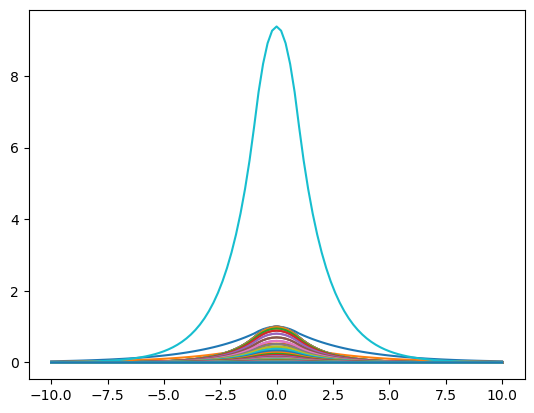

In [67]:
plt.plot(x,Z(x,y))
plt.show()

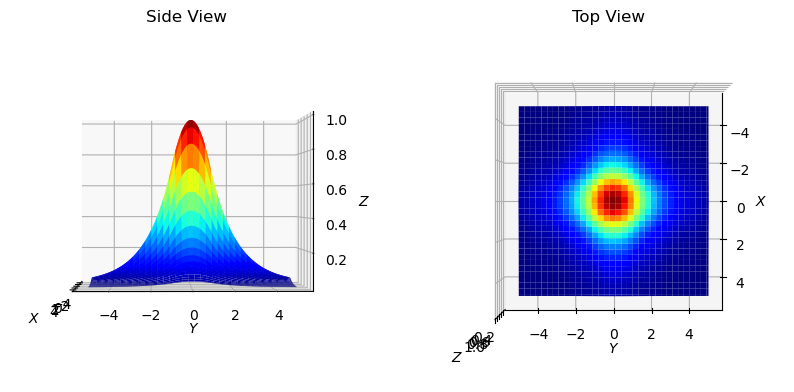

In [68]:
from mpl_toolkits.mplot3d import Axes3D

x = np.linspace(-5, 5, 101)
y = np.linspace(-5, 5, 101)

X, Y = np.meshgrid(x, y)
Z =Z(x,y)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(X, Y, Z, cmap = plt.cm.jet)
ax.set_xlabel('$X$')
ax.set_ylabel('$Y$')
ax.set_zlabel('$Z$')
plt.title("Side View")
for angle in range(0, 360):
    ax.view_init(0, angle)
ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(X, Y, Z, cmap = plt.cm.jet)
ax.set_xlabel('$X$')
ax.set_ylabel('$Y$')
ax.set_zlabel('$Z$')
plt.title("Top View")
for angle in range(0, 360):
    ax.view_init(90, angle)
plt.show()
